<a href="https://colab.research.google.com/github/obagregory/felix/blob/master/23402575Gregory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Re-attempting to load the latest uploaded file to ensure we have the correct data.
file_path = 'houseprice.csv'
house = pd.read_csv(file_path)


# Display the first few rows to verify successful loading
house.head()



,Price,Sqr Ft,Longitude,Latitude,Lot Size,Beds,Bath,Year Built,Price Sqr Ft,Last Sold Year,Last Sold For,Address,City,State,Zipcode,Address Full
0,"$895,900","3,447 sqft",-112.081985,33.560055,"7,895 sqft",4.0,4.5,2019.0,$260/sqft,NaN,NaN,"630 W Echo Ln Phoenix, AZ 85021",Phoenix,AZ,85021.0,"630 W Echo Ln, Phoenix, AZ 85021"
1,"$247,000","1,767 sqft",-96.676250,32.829227,"7,877 sqft",3.0,2.0,1954.0,$140/sqft,NaN,NaN,"2367 Highwood Dr Dallas, TX 75228",Dallas,TX,75228.0,"2367 Highwood Dr, Dallas, TX 75228"
2,"$44,900","1,232 sqft",-78.825190,42.913000,"3,510 sqft",3.0,1.0,1900.0,$36/sqft,NaN,NaN,"30 Hurlock Ave Buffalo, NY 14211",Buffalo,NY,14211.0,"30 Hurlock Ave, Buffalo, NY 14211"
3,"$959,000","1,417 sqft",-73.860170,40.722960,"2,598 sqft",3.0,2.0,1939.0,$677/sqft,2009.0,"$532,000","6416 Alderton St Flushing, NY 11374",Flushing,NY,11374.0,"6416 Alderton St, Flushing, NY 11374"
4,"$83,500",440 sqft,-80.206314,25.937965,NaN,NaN,1.0,1971.0,$190/sqft,2007.0,"$52,000","251 NW 177th St #A-123 Miami Gardens, FL 33169",Miami Gardens,FL,33169.0,"251 NW 177th St #A-123, Miami Gardens, FL 33169"


In [52]:
house.columns

Index(['Price', 'Sqr Ft', 'Longitude', 'Latitude', 'Lot Size', 'Beds', 'Bath',
       'Year Built', 'Price Sqr Ft', 'Last Sold Year', 'Last Sold For',
       'Address', 'City', 'State', 'Zipcode', 'Address Full'],
      dtype='object')

In [53]:
housing = house[['Price Sqr Ft', 'Longitude', 'Latitude', 'Beds', 'Bath','Year Built','Zipcode',]]
housing.head()

,Price Sqr Ft,Longitude,Latitude,Beds,Bath,Year Built,Zipcode
0,$260/sqft,-112.081985,33.560055,4.0,4.5,2019.0,85021.0
1,$140/sqft,-96.676250,32.829227,3.0,2.0,1954.0,75228.0
2,$36/sqft,-78.825190,42.913000,3.0,1.0,1900.0,14211.0
3,$677/sqft,-73.860170,40.722960,3.0,2.0,1939.0,11374.0
4,$190/sqft,-80.206314,25.937965,NaN,1.0,1971.0,33169.0


In [54]:
housing['Price Sqr Ft'] = housing['Price Sqr Ft'].str.replace('[\$,/sqft]', '', regex=True)
housing['Price Sqr Ft'] = pd.to_numeric(housing['Price Sqr Ft'], errors='coerce').astype('Int64')

In [55]:
housing.head()

,Price Sqr Ft,Longitude,Latitude,Beds,Bath,Year Built,Zipcode
0,260,-112.081985,33.560055,4.0,4.5,2019.0,85021.0
1,140,-96.676250,32.829227,3.0,2.0,1954.0,75228.0
2,36,-78.825190,42.913000,3.0,1.0,1900.0,14211.0
3,677,-73.860170,40.722960,3.0,2.0,1939.0,11374.0
4,190,-80.206314,25.937965,NaN,1.0,1971.0,33169.0


In [56]:
housing.shape

(30006, 7)

In [57]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30006 entries, 0 to 30005
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price Sqr Ft  27271 non-null  Int64  
 1   Longitude     30006 non-null  float64
 2   Latitude      30006 non-null  float64
 3   Beds          27420 non-null  float64
 4   Bath          27496 non-null  float64
 5   Year Built    26258 non-null  float64
 6   Zipcode       30003 non-null  float64
dtypes: Int64(1), float64(6)
memory usage: 1.6 MB


In [58]:
housing.dropna(inplace=True)

In [59]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24625 entries, 0 to 30005
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price Sqr Ft  24625 non-null  Int64  
 1   Longitude     24625 non-null  float64
 2   Latitude      24625 non-null  float64
 3   Beds          24625 non-null  float64
 4   Bath          24625 non-null  float64
 5   Year Built    24625 non-null  float64
 6   Zipcode       24625 non-null  float64
dtypes: Int64(1), float64(6)
memory usage: 1.5 MB


In [60]:
housing.describe()

,Price Sqr Ft,Longitude,Latitude,Beds,Bath,Year Built,Zipcode
count,24625.0,24625.000000,24625.000000,24625.000000,24625.000000,24625.000000,24625.000000
mean,349.14335,-95.104453,36.210557,3.277442,2.584782,1974.072812,59107.262335
std,8516.49939,15.537060,5.529544,1.355273,1.321797,33.988656,27295.157276
min,0.0,-149.954530,25.551378,1.000000,0.750000,1800.000000,2108.000000
25%,119.0,-110.821940,32.780155,3.000000,2.000000,1951.000000,33138.000000
50%,169.0,-93.332970,36.061203,3.000000,2.000000,1979.000000,67206.000000
75%,270.0,-81.591550,40.043087,4.000000,3.000000,2004.000000,85018.000000
max,1100000.0,-70.997740,61.442024,65.000000,36.000000,2019.000000,99587.000000


In [61]:
housing.isnull().sum()*100/house.shape[0]

,0
Price Sqr Ft,0.0
Longitude,0.0
Latitude,0.0
Beds,0.0
Bath,0.0
Year Built,0.0
Zipcode,0.0


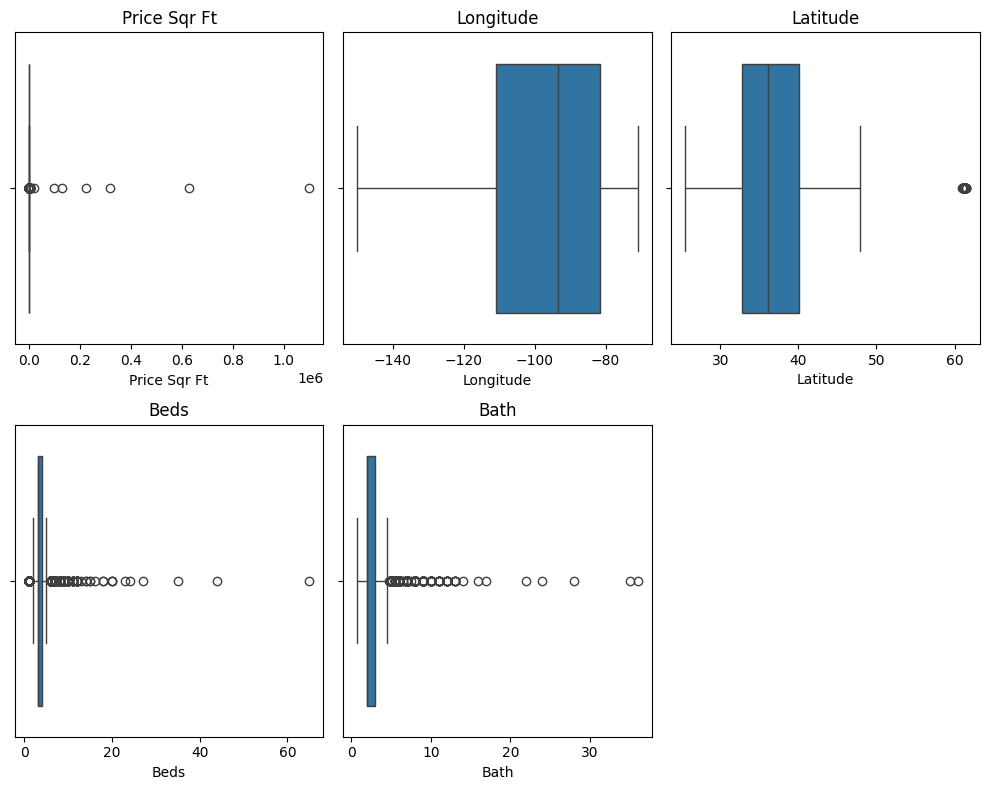

In [62]:
fig, axs = plt.subplots(2, 3, figsize=(10, 8))

sns.boxplot(data=housing, x='Price Sqr Ft', ax=axs[0, 0])
axs[0, 0].set_title('Price Sqr Ft')

sns.boxplot(data=housing, x='Longitude', ax=axs[0, 1])
axs[0, 1].set_title('Longitude')

sns.boxplot(data=housing, x='Latitude', ax=axs[0, 2])
axs[0, 2].set_title('Latitude')

sns.boxplot(data=housing, x='Beds', ax=axs[1, 0])
axs[1, 0].set_title('Beds')

sns.boxplot(data=housing, x='Bath', ax=axs[1, 1])
axs[1, 1].set_title('Bath')

axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

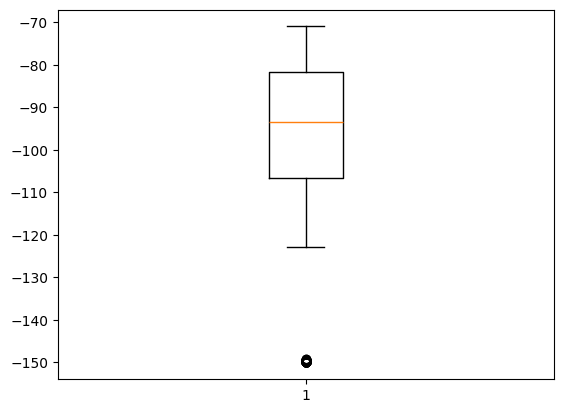

In [63]:
plt.boxplot(house.Longitude)
Q1 = house.Beds.quantile(0.25)
Q3 = house.Beds.quantile(0.75)
IQR = Q3 - Q1
house = house[(house.Beds >= Q1 - 1.5*IQR) & (house.Beds <= Q3 + 1.5*IQR)]

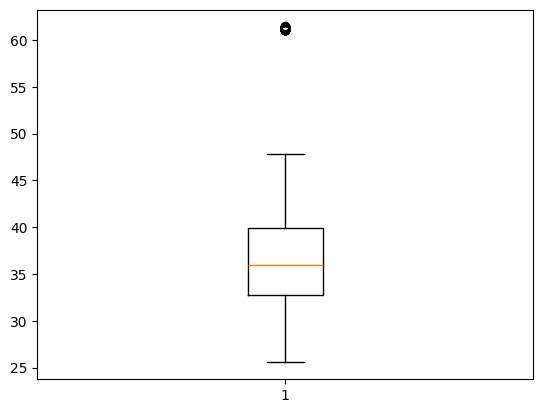

In [64]:
plt.boxplot(house.Latitude)
Q1 = house.Bath.quantile(0.25)
Q3 = house.Bath.quantile(0.75)
IQR = Q3 - Q1
house = house[(house.Bath >= Q1 - 1.5*IQR) & (house.Bath <= Q3 + 1.5*IQR)]

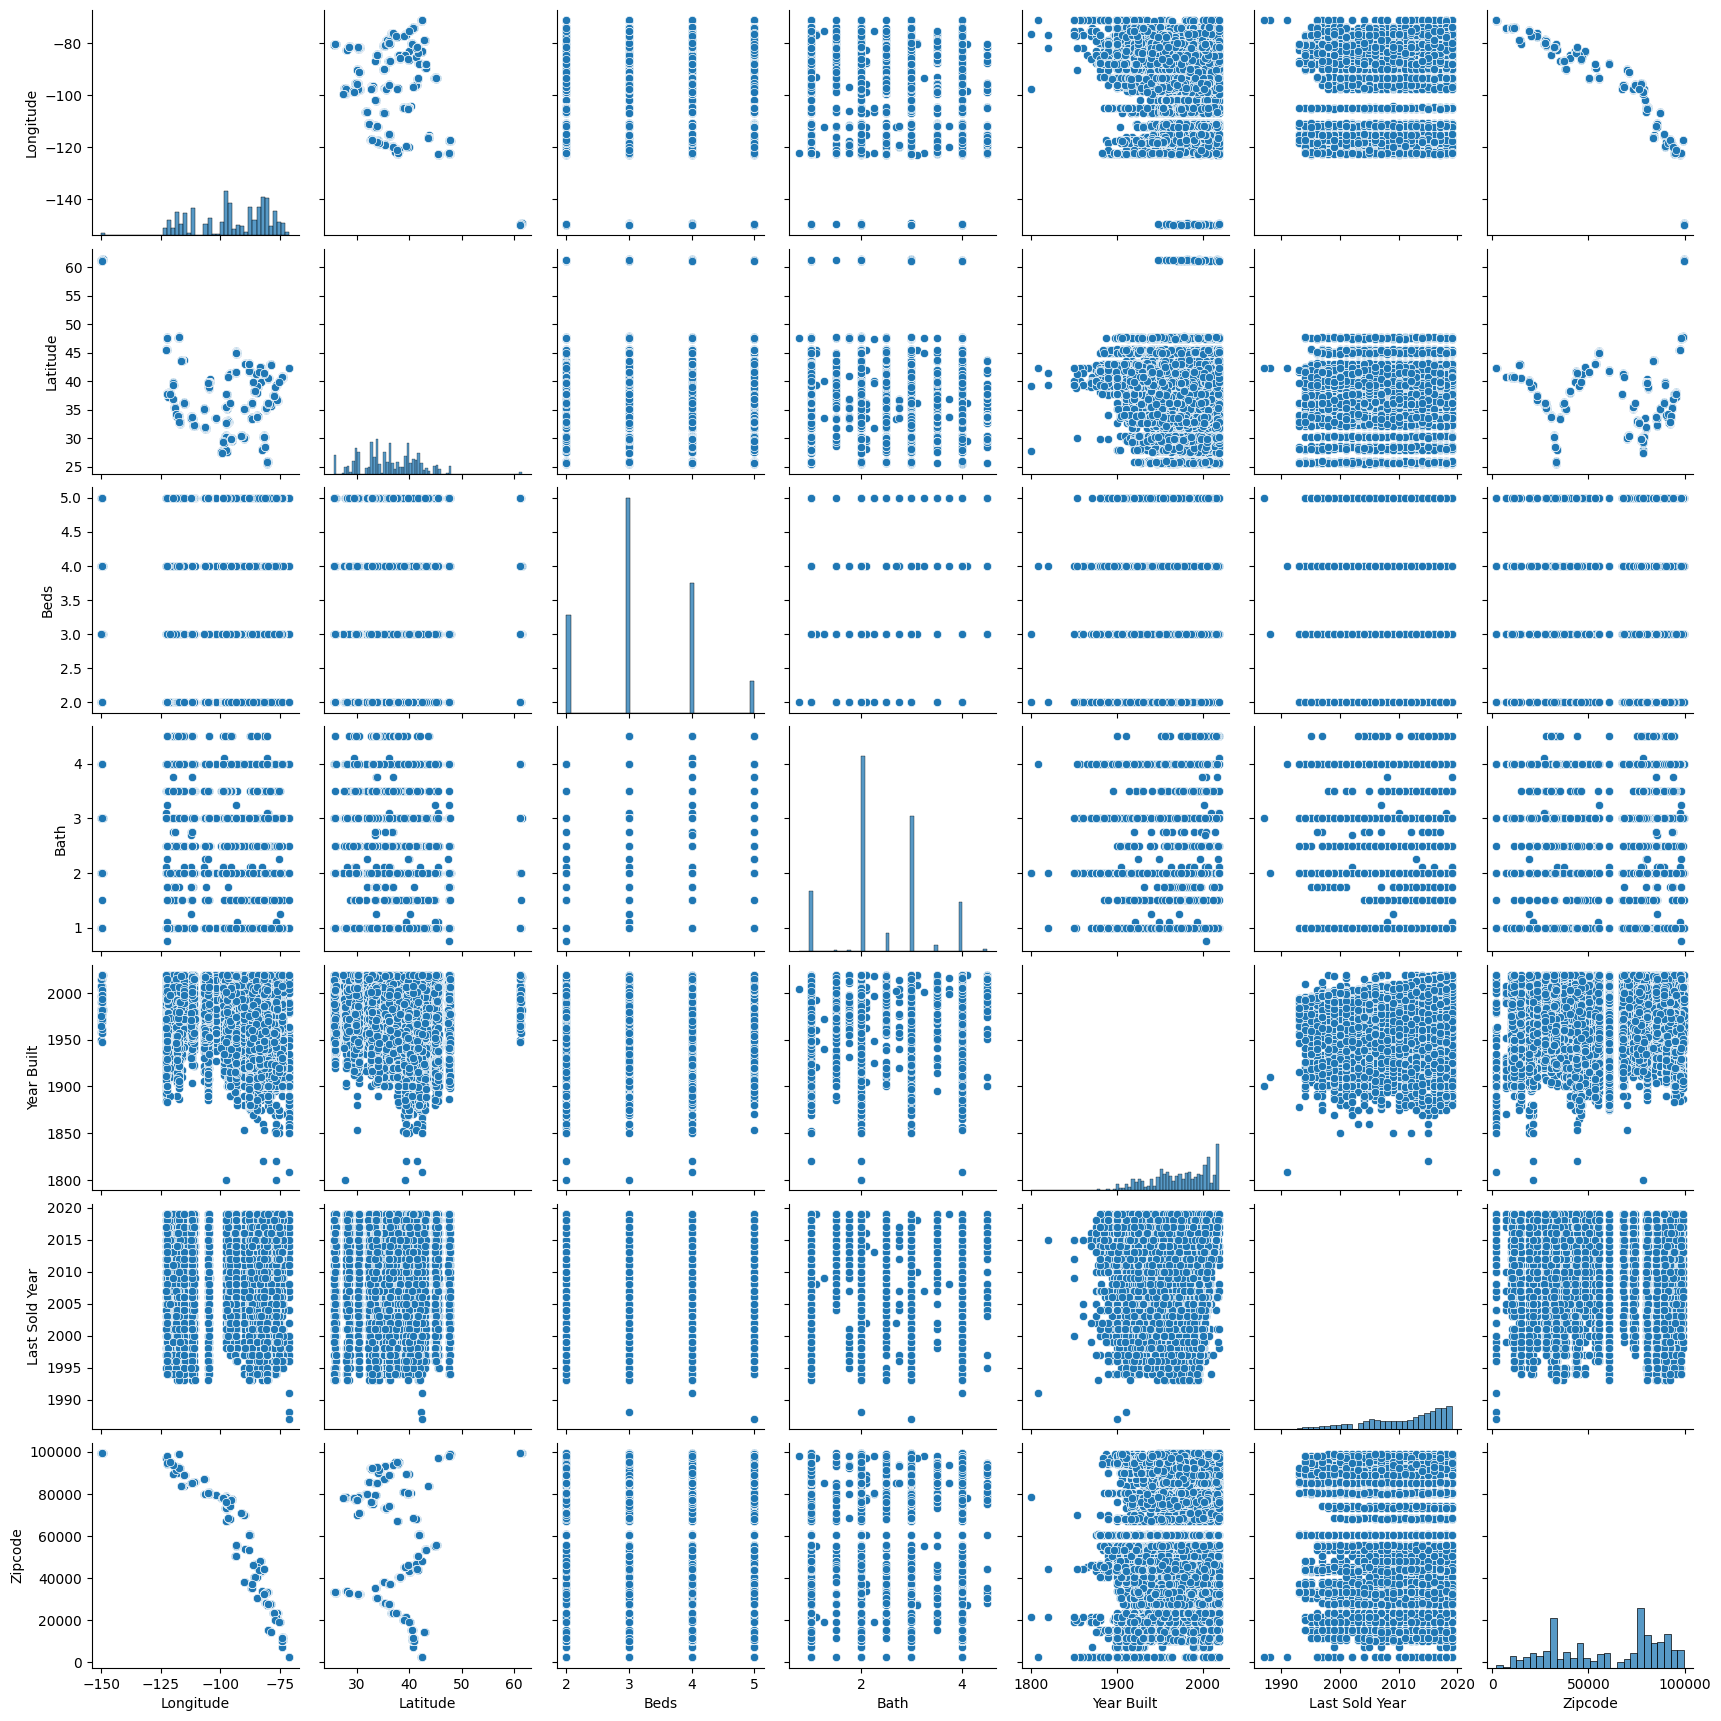

In [65]:
sns.pairplot(house)
plt.show()

In [66]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [67]:
num_vars = ['Beds', 'Bath', 'Longitude', 'Latitude']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [68]:
df_train.head()

,Price Sqr Ft,Longitude,Latitude,Beds,Bath,Year Built,Zipcode
20061,224,0.765432,0.487186,0.031250,0.036496,2004.0,53719.0
14522,375,0.883526,0.006107,0.015625,0.036496,2008.0,33130.0
17957,160,0.868537,0.082690,0.031250,0.065693,2007.0,32806.0
25990,138,0.948034,0.403904,0.031250,0.007299,1950.0,19111.0
15089,151,0.665036,0.199412,0.031250,0.036496,1948.0,76116.0


In [69]:
df_train.describe()

,Price Sqr Ft,Longitude,Latitude,Beds,Bath,Year Built,Zipcode
count,17237.0,17237.000000,17237.000000,17237.000000,17237.000000,17237.000000,17237.000000
mean,374.736555,0.694172,0.297070,0.035535,0.053310,1974.050589,59150.100888
std,9885.75701,0.196981,0.153369,0.020896,0.037494,33.854896,27339.237541
min,0.0,0.000000,0.000000,0.000000,0.000000,1800.000000,2108.000000
25%,119.0,0.494852,0.201654,0.031250,0.036496,1951.000000,33137.000000
50%,170.0,0.717063,0.293123,0.031250,0.036496,1979.000000,67211.000000
75%,271.0,0.865916,0.403505,0.046875,0.065693,2004.000000,85020.000000
max,1100000.0,1.000000,1.000000,1.000000,1.000000,2019.000000,99577.000000


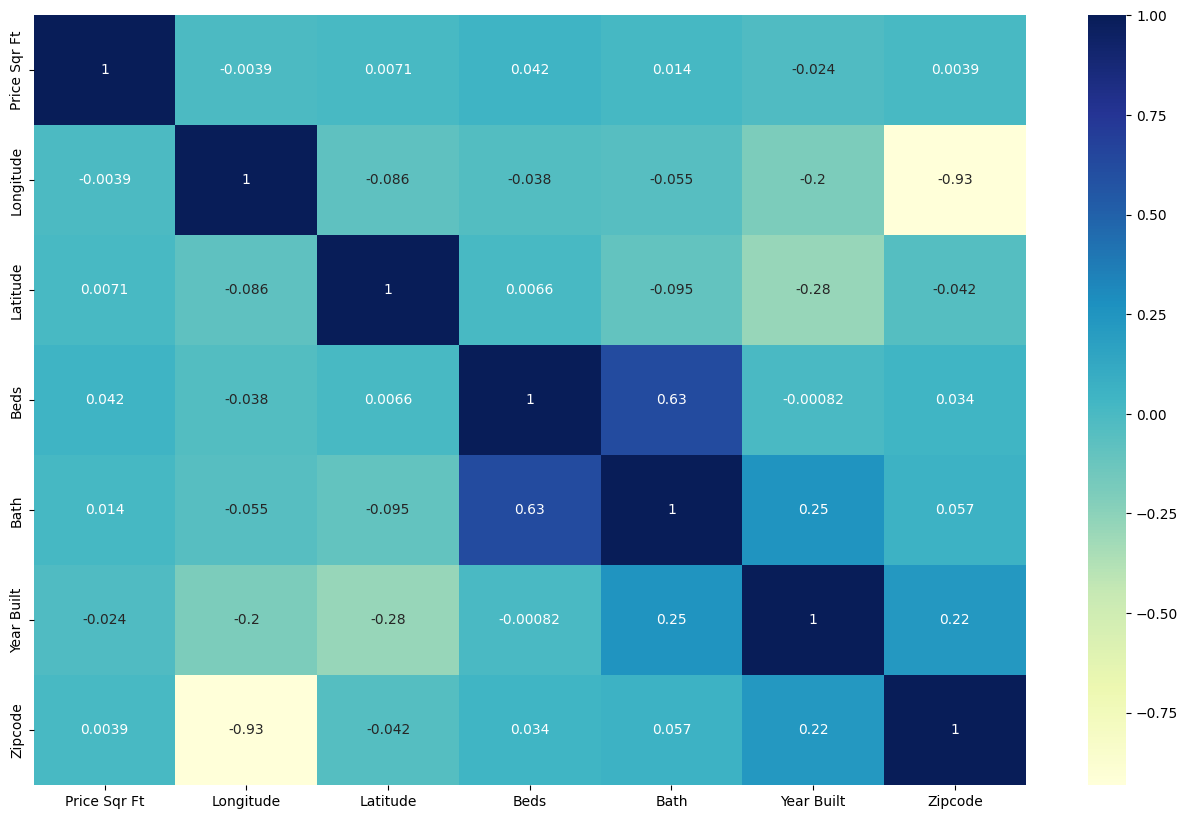

In [70]:
df_train= housing.apply(pd.to_numeric, errors='coerce')
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [71]:
# Optionally, handle NaN values if there are any (e.g., impute with column mean)
df_train.fillna(df_train.mean(), inplace=True)

# Check the result
print(df_train.head())

   Price Sqr Ft   Longitude   Latitude  Beds  Bath  Year Built  Zipcode
0           260 -112.081985  33.560055   4.0   4.5      2019.0  85021.0
1           140  -96.676250  32.829227   3.0   2.0      1954.0  75228.0
2            36  -78.825190  42.913000   3.0   1.0      1900.0  14211.0
3           677  -73.860170  40.722960   3.0   2.0      1939.0  11374.0
5           340 -111.943670  33.494385   4.0   4.0      1957.0  85251.0


In [72]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

In [73]:
y_train = df_train.pop('Price Sqr Ft')
X_train = df_train

In [74]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [75]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [76]:
rfe = RFE(lm, n_features_to_select=6)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [77]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Longitude', True, 1),
 ('Latitude', True, 1),
 ('Beds', True, 1),
 ('Bath', True, 1),
 ('Year Built', True, 1),
 ('Zipcode', True, 1)]

In [78]:
col = X_train.columns[rfe.support_]
col

Index(['Longitude', 'Latitude', 'Beds', 'Bath', 'Year Built', 'Zipcode'], dtype='object')

In [79]:
X_train_rfe = X_train[col]

In [80]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [81]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [82]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           Price Sqr Ft   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     9.880
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           6.51e-11
Time:                        17:09:08   Log-Likelihood:            -2.5776e+05
No. Observations:               24625   AIC:                         5.155e+05
Df Residuals:                   24618   BIC:                         5.156e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.071e+04   3632.494      2.947      0.0

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4489.55
1,Longitude,8.71
6,Zipcode,8.63
4,Bath,1.85
3,Beds,1.73
5,Year Built,1.26
2,Latitude,1.24


In [85]:
y_train_price = lm.predict(X_train_rfe)

In [86]:
res = (y_train_price - y_train)

In [87]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

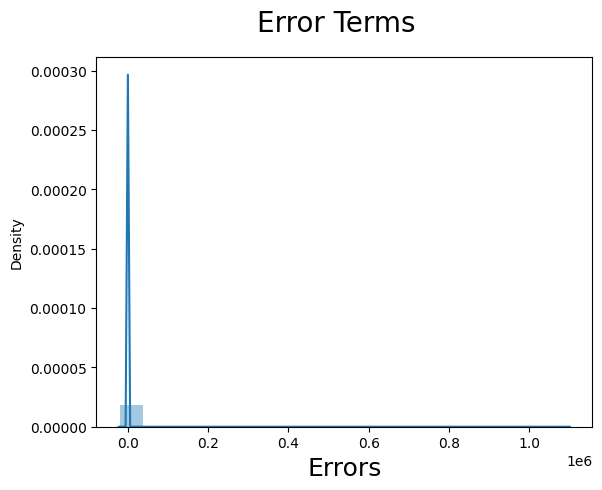

In [88]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label


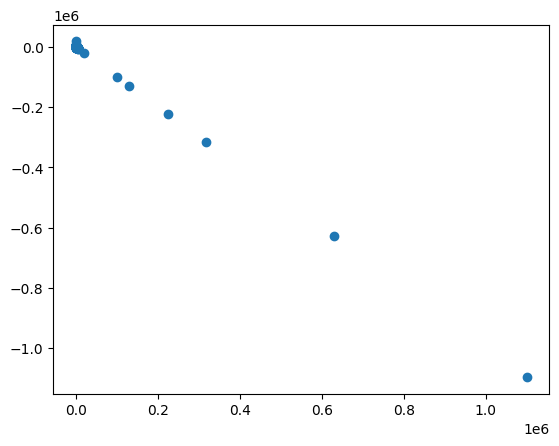

In [89]:
plt.scatter(y_train,res)
plt.show()

In [90]:
num_vars = ['Beds', 'Bath', 'Longitude', 'Latitude']

In [91]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [92]:
y_test = df_test.pop('Price Sqr Ft')
X_test = df_test

In [93]:
X_test = sm.add_constant(X_test)

In [94]:
X_test_rfe = X_test[X_train_rfe.columns]

In [95]:
y_pred = lm.predict(X_test_rfe)

In [96]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.02745626534930623

Text(0, 0.5, 'y_pred')

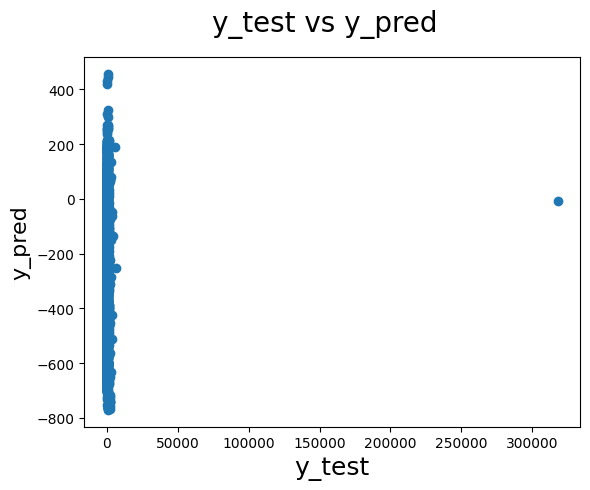

In [97]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label